# LSBG Redshift Distribution

Following the work of [Gatti & Giannini+2020](https://arxiv.org/abs/2012.08569), we use a modified version of the clustering redshift method to derive the redshift distributions of the red and blue LSBG lens samples ([Tangolidis et al. 2020](https://arxiv.org/pdf/2006.04294.pdfLSBGs)). The clustering redshifts method estimates the redshift distribution of an "unknown" galaxy sample by exploiting the two-point correlation signal between the unknown sample and a "reference" sample of galaxies with trusted redshifts. We cross-correlate the positions of the LSBG catalog with the positions of the all-sky 2MASS Photometric Redshift catalog ([Bilicki+2014](https://arxiv.org/abs/1311.5246)), which contains approximately $10^6$ galaxies. For the red LSBG sample, with $g-i>0.6$, we divide the reference sample redshifts into thin bins with a width of 0.01 over the range $[0.0-0.14]$, finding little cross-correlation signal beyond this range. For the blue sample ($g-i<0.6$), we use bin widths of 0.02 over the range $[0.0-0.20]$. We obtain the necessary cross-correlation measurements using [TreeCorr](https://rmjarvis.github.io/TreeCorr/_build/html/index.html). 

Note: The randoms footprint ('y3a2_footprint_grizY_any.fits') and the 2MPZ catalog ('2MPZ.fits') are too large to store in github and are available upon request.

## Imports

* We use numpy for numerical calculation and analysis
* We use matplotlib for plotting and visualization
* We use fits to open the 2MPZ catalog
* We use treecorr for the cross-correlation and autocorrelation measurements
* We use pandas to open csv files
* We use healpy to open the LSBG footprint file

In [1]:
#Loading packages
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import numpy as np
import treecorr
import pandas as pd
from astropy.io import fits
import healpy as hp


## Theory Walkthrough

The clustering redshift signal represents an integral over the product of each population's galaxy-matter bias with the dark matter density two-point correlation function. We follow the procedure used in [Greene+2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...933..150G/abstract) and proposed by [Ménard+2013](https://arxiv.org/abs/1303.4722) and [Schmidt+2013](https://arxiv.org/abs/1303.0292), which describes how we can safely ignore the galaxy bias terms so long as the number density of the unknown sample varies more rapidly than the galaxy bias evolution. With this assumption in hand, the redshift distribution can be estimated at the central redshift of each bin $z_i$ as $$n_u(z_i) \propto \frac{\bar{w}_{ur}(z_i)}{w_{DM}(z_i)},$$ where $\bar{w}_{ur}(z_i)$ is the cross-correlation measurement averaged over a given set of angular scales via $$\bar{w}_{ur} = \int_{\theta_\mathrm{min}}^{\theta_\mathrm{max}} W(\theta)w_{ur}d\theta.$$ We use $W(\theta)\propto \theta^{-1}$ as a weighting function to yield optimal S/N in the presence of shot noise. $w_{DM}(z_i)$ is the dark matter density two-point correlation function, which we estimate analytically using the public version of $\texttt{CosmoSIS}$ ([Zuntz+2015](https://arxiv.org/abs/1409.3409)) and the revised fitting function $\texttt{Halofit}$ from [Takahashi+2012](https://arxiv.org/abs/1208.2701). We average these measurements over the following means of the angular scale bins: $\theta=[32.45, 45.23, 63.25]$ arcmin, which correspond to a physical scale range of 0.20-9.37 Mpc. These angular bins act as middle points between the smallest scales that adhere to the theoretical requirements of the $w_{DM}$ term and larger scales with increased errorbars that may suffer from observational systematic effects. We compute the cross-correlation signal as a function of angular scale by using the [Davis & Peebles+1983](https://ui.adsabs.harvard.edu/abs/1983ApJ...267..465D/abstract) estimator: $$w_{ur}(\theta) = \frac{N_{Rr}}{N_{Dr}}\frac{D_u D_r(\theta)}{D_u R_r (\theta)} -1, $$ where $D_u D_r (\theta)$ and $D_u R_r (\theta)$ are the data-data and data-random pairs and $N_{Rr}$ and $N_{Dr}$ are the total number of galaxies in the reference sample and the reference random catalog. 

## Loading Data

### $W_{DM}$  Measurements 

We load in the dark matter two-point correlation function measurements, extracted using $\texttt{CosmoSiS}$. 

In [2]:
bin_1_wdm = np.loadtxt('../data/bin_1_1_red.txt')
bin_2_wdm = np.loadtxt('../data/bin_2_2_red.txt')
bin_3_wdm = np.loadtxt('../data/bin_3_3_red.txt')
bin_4_wdm = np.loadtxt('../data/bin_4_4_red.txt')
bin_5_wdm = np.loadtxt('../data/bin_5_5_red.txt')
bin_6_wdm = np.loadtxt('../data/bin_6_6_red.txt')
bin_7_wdm = np.loadtxt('../data/bin_7_7_red.txt')
bin_8_wdm = np.loadtxt('../data/bin_8_8_red.txt')
bin_9_wdm = np.loadtxt('../data/bin_9_9_red.txt')
bin_10_wdm = np.loadtxt('../data/bin_10_10_red.txt')
bin_11_wdm = np.loadtxt('../data/bin_11_11_red.txt')
bin_12_wdm = np.loadtxt('../data/bin_12_12_red.txt')
bin_13_wdm = np.loadtxt('../data/bin_13_13_red.txt')
bin_14_wdm = np.loadtxt('../data/bin_14_14_red.txt')

In [3]:
bin_1_wdm_blue = np.loadtxt('../data/bin_1_1_blue.txt')
bin_2_wdm_blue = np.loadtxt('../data/bin_2_2_blue.txt')
bin_3_wdm_blue = np.loadtxt('../data/bin_3_3_blue.txt')
bin_4_wdm_blue = np.loadtxt('../data/bin_4_4_blue.txt')
bin_5_wdm_blue = np.loadtxt('../data/bin_5_5_blue.txt')
bin_6_wdm_blue = np.loadtxt('../data/bin_6_6_blue.txt')
bin_7_wdm_blue = np.loadtxt('../data/bin_7_7_blue.txt')
bin_8_wdm_blue = np.loadtxt('../data/bin_8_8_blue.txt')
bin_9_wdm_blue = np.loadtxt('../data/bin_9_9_blue.txt')
bin_10_wdm_blue = np.loadtxt('../data/bin_10_10_blue.txt')


We collect the $w_{DM}$ terms into arrays for easier access

In [4]:
wdm_arr_red = np.array([bin_1_wdm, bin_2_wdm, bin_3_wdm, bin_4_wdm, bin_5_wdm, bin_6_wdm, bin_7_wdm, bin_8_wdm, bin_9_wdm, bin_10_wdm, bin_11_wdm, bin_12_wdm, bin_13_wdm, bin_14_wdm])
wdm_arr_blue = np.array([bin_1_wdm_blue, bin_2_wdm_blue, bin_3_wdm_blue, bin_4_wdm_blue, bin_5_wdm_blue, bin_6_wdm_blue, bin_7_wdm_blue, bin_8_wdm_blue, bin_9_wdm_blue, bin_10_wdm_blue])


## LSBG Catalog

We load in the LSBG catalog (the unknown sample) and construct the photometric masks for the red and blue LSBG samples.

In [5]:
#LSBG catalog (unknown) 
lens_file=pd.read_csv(r'../data/LSBG_catalog_v2.csv')
lens_lsbg=pd.DataFrame(lens_file, columns=['ra_se','dec_se','mag_gfm_g_corr','mag_gfm_i_corr']) #Selecting lens columns
g = lens_lsbg['mag_gfm_g_corr']
i = lens_lsbg['mag_gfm_i_corr']
mask_red = (g-i >=0.60) #Red and blue galaxy masks
mask_blue = (g-i<=0.60)

## Randoms Sample

We construct the random catalog based on the LSBG catalog footprint. 

In [6]:
#Setting up random catalog
MAP = hp.read_map('../data/y3a2_footprint_grizY_any.fits')
conv = np.pi/180.
ra_min = -70.0*conv
ra_max = 110.*conv
dec_min = -70.*conv
dec_max = 10.*conv
rand_ra = np.random.uniform(ra_min, ra_max, 10**7)
rand_sindec = np.random.uniform(np.sin(dec_min), np.sin(dec_max), 10**7)
rand_dec = np.arcsin(rand_sindec)
#Get the healpix indices of the randoms
HP_ind_rand = hp.ang2pix(4096, rand_ra/conv, rand_dec/conv, lonlat=True)
#Get a mask - 1 inside the DES mask, keeping only the randoms within the DES mask
DES_mask = np.zeros(len(MAP))
DES_mask[MAP>0] = 1
#Keeping the local mask
LOCAL_mask_rand = DES_mask[HP_ind_rand]
#Keeping those with LOCAL_mask=1
rand_ra_pos = rand_ra[LOCAL_mask_rand==1]
rand_dec_pos = rand_dec[LOCAL_mask_rand==1]



We produce a treecorr catalog for the randoms and for the red and blue LSBGs.

In [7]:
irancat = treecorr.Catalog(ra=rand_ra_pos, dec=rand_dec_pos, ra_units='radians', dec_units='radians', npatch=100) 
irancat.write_patch_centers('patch_file')

icat_red = treecorr.Catalog(ra=lens_lsbg['ra_se'][mask_red], dec=lens_lsbg['dec_se'][mask_red], ra_units='deg', dec_units='deg', patch_centers='patch_file') 
icat_blue = treecorr.Catalog(ra=lens_lsbg['ra_se'][mask_blue], dec=lens_lsbg['dec_se'][mask_blue], ra_units='deg', dec_units='deg', patch_centers='patch_file') 


## 2MPZ Catalog

We load in the 2MPZ catalog, or the reference sample. We apply a mask so the 2MPZ catalog follows the same footprint as the randoms and LSBG sample.

In [8]:
mpz_cat = fits.open('../data/2MPZ.fits')
rad_to_deg =  180.0/np.pi
ra_mpz = rad_to_deg*mpz_cat[1].data['RA']
dec_mpz = rad_to_deg*mpz_cat[1].data['DEC']
z_mpz = mpz_cat[1].data['ZPHOTO']
for i in range(len(ra_mpz)):
    if (ra_mpz[i] > 150.):
        ra_mpz[i] = ra_mpz[i]-360.
box = (ra_mpz>-70.0)&(ra_mpz<110.)&(dec_mpz>-70.0)&(dec_mpz<10.0)
ra_mpz = ra_mpz[box]
dec_mpz = dec_mpz[box]
z_mpz = z_mpz[box]
DES_mask = np.zeros(len(MAP))
DES_mask[MAP>0] = 1


## Cross Correlation Measurements

We define a function that produces the cross-correlation measurements between the reference and the unknown sample. First, the function splits the reference sample (2MPZ catalog) based on the redshift binning of the dark matter two-point correlation function. Then, the cross-correlation measurements between the reference sample, the unknown sample, and the randoms sample are performed. The function returns the cross-correlation measurements and the angular scales (in arcminutes). 

In [9]:
def cross_correlation(wdm_length=None, bin_width=None, ra_ref=None, dec_ref=None, z_ref=None, icat=None, irancat=None):
    """
    Performs the cross-correlation measurements between the unknown and reference sample
    
    wdm_length = length of the dark matter two-point correlation array
    bin_width = width of redshift bins in the reference sample 
    ra_ref = reference sample RA (deg)
    dec_ref = reference sample DEC (deg)
    z_ref = redshifts of reference sample
    icat = unknown sample treecorr catalog (in this case, LSBG catalog)
    irancat = randoms catalog
    
    Returns: list of cross correlations and angular bins
    """
    nn_list = []
    theta_list = []
    for i in range(wdm_length):
    #We define the limits of the redshift bins
        ra_ref_loop = ra_ref[((bin_width*i)<z_ref) & (z_ref<(bin_width*(i+1)))]
        dec_ref_loop = dec_ref[((bin_width*i)<z_ref) & (z_ref<(bin_width*(i+1)))]
        HP_ind_ref = hp.ang2pix(4096, ra_ref_loop, dec_ref_loop, lonlat=True)
        LOCAL_mask_ref = DES_mask[HP_ind_ref]
        ra_ref_in = ra_ref_loop[LOCAL_mask_ref==1]
        dec_ref_in = dec_ref_loop[LOCAL_mask_ref==1]
        jcat = treecorr.Catalog(ra=ra_ref_in, dec=dec_ref_in, ra_units='deg', dec_units='deg', patch_centers='patch_file')
    
        #We calculate the cross-correlations, random-correlations, and data-random correlations
        nn = treecorr.NNCorrelation(nbins=22, min_sep=.25, max_sep=400, sep_units='arcmin')
        nn.process(icat, jcat, low_mem=True)
        rr = treecorr.NNCorrelation(nbins=22, min_sep=.25, max_sep=400, sep_units='arcmin')
        rr.process(irancat, jcat, low_mem=True)
            
        nn.calculateXi(rr)
        xi=np.array(nn.xi) 
        theta=np.exp(nn.logr)
        var=nn.varxi 
        cov_jk=nn.estimate_cov('jackknife') 

        nn_list.append(nn)
        theta_list.append(theta)
    return nn_list, theta_list


In [10]:
nn_list_red, theta_list_red = cross_correlation(wdm_length=len(wdm_arr_red), bin_width=0.01, ra_ref=ra_mpz, dec_ref=dec_mpz, z_ref=z_mpz, icat=icat_red, irancat=irancat)

nn_list_blue, theta_list_blue = cross_correlation(wdm_length=len(wdm_arr_blue), bin_width=0.02, ra_ref=ra_mpz, dec_ref=dec_mpz, z_ref=z_mpz, icat=icat_blue, irancat=irancat)



The following patch numbers have no objects: {0, 2, 9, 19, 20, 23, 24, 25, 26, 28, 30, 31, 32, 33, 41, 42, 43, 46, 52, 54, 58, 61, 64, 66, 70, 74, 76, 81, 82}
This may be a problem depending on your use case.


/Users/nathaliechicoine/opt/anaconda3/lib/python3.9/site-packages/treecorr/util.py:665: FutureWarning: Use of keyword-only arguments as positional arguments is deprecated in the function calculateXi. The following parameters now require an explicit keyword name: ['rr']
  warnings.warn(


As discussed, we average the cross correlation measurements over the means of the angular scale bins $\theta=[32.45, 45.23, 63.26]$. We extract the corresponding angular scales from the dark matter two-point correlation arrays.

In [11]:
corrs_red = nn_list_red
w_dm_index14_red = wdm_arr_red[:,14]
w_dm_index15_red = wdm_arr_red[:,15]
w_dm_index16_red = wdm_arr_red[:,16]


In [12]:
corrs_blue = nn_list_blue
w_dm_index14_blue = wdm_arr_blue[:,14]
w_dm_index15_blue = wdm_arr_blue[:,15]
w_dm_index16_blue = wdm_arr_blue[:,16]


In [13]:
theta_red = np.array(theta_list_red)[0,:]
theta_blue = np.array(theta_list_blue)[0,:]

In treecorr, to properly extract the jackknife covariance from a derived function we must use lambda functions. We define lambda functions for the red and blue redshift distributions. As described, the cross-correlation measurements for each redshift bin are averaged over the selected angular scales, divided by the dark matter two-point correlation function, and weighted by $\theta^{-1}$.

In [14]:
func_red = lambda corrs_red: (
        np.average([
            (np.array([corrs_red[0].xi, corrs_red[1].xi, corrs_red[2].xi, corrs_red[3].xi, corrs_red[4].xi, corrs_red[5].xi, corrs_red[6].xi, corrs_red[7].xi, corrs_red[8].xi, corrs_red[9].xi, corrs_red[10].xi, corrs_red[11].xi, corrs_red[12].xi, corrs_red[13].xi])[:,14]) /(w_dm_index14_red)*(1/theta_red[14]),
            (np.array([corrs_red[0].xi, corrs_red[1].xi, corrs_red[2].xi, corrs_red[3].xi, corrs_red[4].xi, corrs_red[5].xi, corrs_red[6].xi, corrs_red[7].xi, corrs_red[8].xi, corrs_red[9].xi, corrs_red[10].xi, corrs_red[11].xi, corrs_red[12].xi, corrs_red[13].xi])[:,15]) / (w_dm_index15_red)*(1/theta_red[15]),
            (np.array([corrs_red[0].xi, corrs_red[1].xi, corrs_red[2].xi, corrs_red[3].xi, corrs_red[4].xi, corrs_red[5].xi, corrs_red[6].xi, corrs_red[7].xi, corrs_red[8].xi, corrs_red[9].xi, corrs_red[10].xi, corrs_red[11].xi, corrs_red[12].xi, corrs_red[13].xi])[:,16]) / (w_dm_index16_red)*(1/theta_red[16])], axis=0) /
        np.trapz(np.average([
            (np.array([corrs_red[0].xi, corrs_red[1].xi, corrs_red[2].xi, corrs_red[3].xi, corrs_red[4].xi, corrs_red[5].xi, corrs_red[6].xi, corrs_red[7].xi, corrs_red[8].xi, corrs_red[9].xi, corrs_red[10].xi, corrs_red[11].xi, corrs_red[12].xi, corrs_red[13].xi])[:,14]) /(w_dm_index14_red)*(1/theta_red[14]),
            (np.array([corrs_red[0].xi, corrs_red[1].xi, corrs_red[2].xi, corrs_red[3].xi, corrs_red[4].xi, corrs_red[5].xi, corrs_red[6].xi, corrs_red[7].xi, corrs_red[8].xi, corrs_red[9].xi, corrs_red[10].xi, corrs_red[11].xi, corrs_red[12].xi, corrs_red[13].xi])[:,15]) / (w_dm_index15_red)*(1/theta_red[15]),
            (np.array([corrs_red[0].xi, corrs_red[1].xi, corrs_red[2].xi, corrs_red[3].xi, corrs_red[4].xi, corrs_red[5].xi, corrs_red[6].xi, corrs_red[7].xi, corrs_red[8].xi, corrs_red[9].xi, corrs_red[10].xi, corrs_red[11].xi, corrs_red[12].xi, corrs_red[13].xi])[:,16]) /(w_dm_index16_red)*(1/theta_red[16])], axis=0), axis=0))



In [15]:
zldist_red = func_red(corrs_red)
zl_covariance_red = treecorr.estimate_multi_cov(corrs_red, 'jackknife', func_red)


/Users/nathaliechicoine/opt/anaconda3/lib/python3.9/site-packages/treecorr/util.py:665: FutureWarning: Use of keyword-only arguments as positional arguments is deprecated in the function estimate_multi_cov. The following parameters now require an explicit keyword name: ['func']
  warnings.warn(


In [16]:
func_blue = lambda corrs_blue: (
        np.average([
            (np.array([corrs_blue[0].xi, corrs_blue[1].xi, corrs_blue[2].xi, corrs_blue[3].xi, corrs_blue[4].xi, corrs_blue[5].xi, corrs_blue[6].xi, corrs_blue[7].xi, corrs_blue[8].xi, corrs_blue[9].xi])[:,14]) /(w_dm_index14_blue)*(1/theta_blue[14]),
            (np.array([corrs_blue[0].xi, corrs_blue[1].xi, corrs_blue[2].xi, corrs_blue[3].xi, corrs_blue[4].xi, corrs_blue[5].xi, corrs_blue[6].xi, corrs_blue[7].xi, corrs_blue[8].xi, corrs_blue[9].xi])[:,15]) /(w_dm_index15_blue)*(1/theta_blue[15]),
            (np.array([corrs_blue[0].xi, corrs_blue[1].xi, corrs_blue[2].xi, corrs_blue[3].xi, corrs_blue[4].xi, corrs_blue[5].xi, corrs_blue[6].xi, corrs_blue[7].xi, corrs_blue[8].xi, corrs_blue[9].xi])[:,16]) /(w_dm_index16_blue)*(1/theta_blue[16])], axis=0) /
        np.trapz(np.average([
            (np.array([corrs_blue[0].xi, corrs_blue[1].xi, corrs_blue[2].xi, corrs_blue[3].xi, corrs_blue[4].xi, corrs_blue[5].xi, corrs_blue[6].xi, corrs_blue[7].xi, corrs_blue[8].xi, corrs_blue[9].xi])[:,14]) /(w_dm_index14_blue)*(1/theta_blue[14]),
            (np.array([corrs_blue[0].xi, corrs_blue[1].xi, corrs_blue[2].xi, corrs_blue[3].xi, corrs_blue[4].xi, corrs_blue[5].xi, corrs_blue[6].xi, corrs_blue[7].xi, corrs_blue[8].xi, corrs_blue[9].xi])[:,15]) /(w_dm_index15_blue)*(1/theta_blue[15]),
            (np.array([corrs_blue[0].xi, corrs_blue[1].xi, corrs_blue[2].xi, corrs_blue[3].xi, corrs_blue[4].xi, corrs_blue[5].xi, corrs_blue[6].xi, corrs_blue[7].xi, corrs_blue[8].xi, corrs_blue[9].xi])[:,16]) /(w_dm_index16_blue)*(1/theta_blue[16])], axis=0), axis=0))


In [17]:
zldist_blue = func_blue(corrs_blue)


zl_covariance_blue = treecorr.estimate_multi_cov(corrs_blue, 'jackknife', func_blue)


We plot the resulting redshift distributions, with the diagonals of the square roots of the jackknife covariance matrix included as errorbars. 

In [18]:
redshift_range_red = np.linspace(0.005, 0.135, 14)
redshift_range_blue = np.linspace(0.01, 0.19, 10)


/var/folders/k7/xk17x8f56cs0qfbgc1vnw58r0000gn/T/ipykernel_91454/3773136309.py:2: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(redshift_range_red, zldist_red, np.diag(np.sqrt(zl_covariance_red)), marker='o', color='firebrick', label='$\\mathrm{Red~LSBGs}$')
/var/folders/k7/xk17x8f56cs0qfbgc1vnw58r0000gn/T/ipykernel_91454/3773136309.py:3: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(redshift_range_blue, zldist_blue, np.diag(np.sqrt(zl_covariance_blue)), marker='o', color='royalblue', label='$\\mathrm{Blue~LSBGs}$')


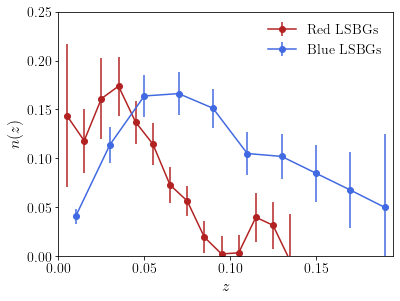

In [19]:
fig = plt.figure(figsize=(6, 4.5))
plt.errorbar(redshift_range_red, zldist_red, np.diag(np.sqrt(zl_covariance_red)), marker='o', color='firebrick', label='$\\mathrm{Red~LSBGs}$')
plt.errorbar(redshift_range_blue, zldist_blue, np.diag(np.sqrt(zl_covariance_blue)), marker='o', color='royalblue', label='$\\mathrm{Blue~LSBGs}$')
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$n(z)$', fontsize=16)
plt.xlim(0.00, 0.195)
plt.ylim(0.0,0.25)
plt.tick_params(axis='both', labelsize=14)
plt.legend(frameon=False, fontsize=14)
plt.show()